In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
RESULT_DIR = '../../results/'
fp = os.path.join(RESULT_DIR, 'results-stress-test.csv')
df = pd.read_csv(fp)

In [4]:
df.head()

,event,n_cases,total time,Average processing time per event,local avg time,Total space used (MB)
0,0,0,NaN,NaN,NaN,12.126268
1,10000,794,2535.162687,0.253516,0.253516,12.983858
2,20000,1591,5078.211308,0.253911,0.254305,13.846060
3,30000,2389,7622.027636,0.254068,0.254382,14.672788
4,40000,3175,10119.366169,0.252984,0.249734,15.560820


In [5]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

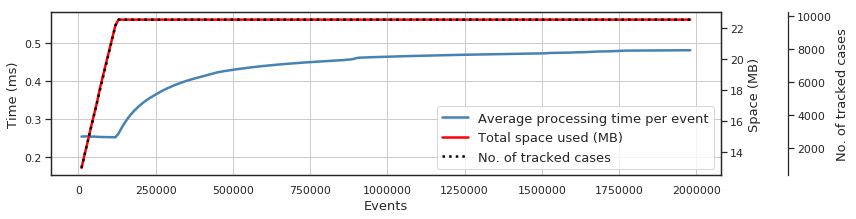

In [7]:
fig, ax = plt.subplots(figsize=(12, 3))
ax1 = ax.twinx()
ax2 = ax.twinx()

sns.set(rc={"lines.linewidth": 2.5}, style='white')
sns.lineplot(x='event', y='Average processing time per event', data=df.iloc[1:,:], ax=ax, color='steelblue')
ax1 = sns.lineplot(x='event', y='Total space used (MB)', data=df.iloc[1:,:], ax=ax1, color='red')
ax1.lines[0].set_linestyle('-')
ax2 = sns.lineplot(x='event', y='n_cases', data=df.iloc[1:,:], ax=ax2, color='black')
ax2.lines[0].set_linestyle(':')
ax.grid()

time_min = df['Average processing time per event'].min()
time_max = df['Average processing time per event'].max()
ax.set_ylim([time_min - 0.1, time_max + 0.1])

ax.set_xlabel('Events', fontsize=13)
ax.set_ylabel('Time (ms)', fontsize=13)
ax1.set_ylabel('Space (MB)', fontsize=13)
ax2.set_ylabel('No. of tracked cases', fontsize=13)

time_line = mlines.Line2D([], [], color='steelblue', label='Average processing time per event')
space_line = mlines.Line2D([], [], color='red', linestyle='-', label='Total space used (MB)')
case_line = mlines.Line2D([], [], color='black', linestyle=':', label='No. of tracked cases')
ax.legend(handles=[time_line, space_line, case_line], fontsize=13)

ax2.spines['right'].set_position(('axes', 1.1))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)

os.makedirs('./images/svg')
out_fp = './images/svg/stress-test.svg'
fig.savefig(out_fp, bbox_inches='tight', rasterized=True)